In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import getcwd

%matplotlib inline
getcwd()

'C:\\Users\\Smartguy\\Desktop\\uData.School\\Math_Tatiana'

# Method of simple iterations

In [2]:
def read_xlsx(task=8):
    
    lab2 = pd.read_excel("lab2.xlsx", sheetname=str(task))
    A = lab2.iloc[:,:-1]
    A.columns=["0","1","2"]
    b = pd.DataFrame(lab2.iloc[:,-1])
    b.columns=["0"]
    
    return A,b

In [3]:
def dimension():

    '''
    n - number of equations, 
    m - number of variables. 
    '''
    print("\nAttention! This function processes only a square matrix of the coefficients of the system of equations \n\
with the column matrix of the constant terms.")
    
    n, m = [],[]
    n = int(input("\nPlease, enter the number of equations.\n\
number_of_equations = "))
    m = int(input("\nPlease, enter the number of variables.\n\
number_of_variables = "))
        
    return n, m

In [4]:
def initializing_system():
    
    '''
    Getting dimension of the matrix A.
    '''
    n, m = dimension()
    
    '''
    Initializing the matrix A.
    '''
    print("\nInitialized matrix A")
    A = pd.DataFrame(np.zeros((n, m)),columns=[str(i) for i in range(n)])
    print(A)
    
    print("\nPlease, enter elements of the matrix A by columns")
    for i in range(n):
        for j in range(m):
             A.iloc[i,j] = float(input("a" + str(i+1) + str(j+1) + '= '))
    print("\nThe matrix A\n" + str(A))            
        
    '''
    Initializing the matrix b.
    '''
    print("\nInitialized matrix b")
    b = pd.DataFrame(np.zeros((n,1)),columns=["0"])
    print(b)
    
    print("\nPlease, enter elements of the matrix b")
    for i in range(n):
        b.iloc[i,0] = float(input("b"+str(i+1)+"= "))
    print("\nThe column matrix b\n"+str(b))
        
    return A,b,n,m

In [5]:
def change_sign(A,b,n):
    
    for i in range(n):
        if A.iloc[i,i]<0:
            A.iloc[i,:] *= -1
            b.iloc[i,:] *= -1
    
    return A,b

In [6]:
def div_by_pivot(A,b):
    
    n=A.shape[0]
    K = np.zeros((1,n))
    
    for i in range(n):
        K[0,i]=A.iloc[i,i]
        
    A=np.divide(A,K.T)
    K=K.T
    b=np.divide(b,K)
    
    return A,b

In [61]:
def numb_iter(B,b,epsilon):
    
    k=0
    q = B.abs().sum(axis=0).max()

    b_norm = np.abs(b).max()
    if q==1:
        k = np.log(epsilon/b_norm)/np.log(q-epsilon)+1
        print("Estimated number of iterations: "+str(np.squeeze(k)))
    else:
        k = np.log(epsilon/b_norm)/np.log(q)+1
        print("Estimated number of iterations: "+str(np.squeeze(k)))
    k = int(np.ceil(k))
    print("Cubic norm of the matrix B is "+str(q))
    
    return k,q

In [16]:
def system_error(A,b,X):
    
    X_copy = X.iloc[-1,:3].copy()
    b = pd.DataFrame(b, columns=["0"])
    sys_err = np.round_(pd.DataFrame(np.dot(A,X_copy),columns=["0"])-b,4)
    
    return sys_err

In [17]:
def L_D_R(A):
    
    '''
    Extracting L
    '''
    L = pd.DataFrame(np.zeros((A.shape[0],A.shape[0])))
    for i in range(1,A.shape[0]):
        L.iloc[i:,i-1] = A.iloc[i:,i-1]
    '''
    Extracting R
    '''
    R = pd.DataFrame(np.zeros((A.shape[0],A.shape[0])))
    for i in range(1,A.shape[0]):
        R.iloc[:i,i] = A.iloc[:i,i]
    '''
    Extracting D
    '''
    D = pd.DataFrame(data=np.identity(A.shape[0]),
                     columns=[str(i) for i in range(A.shape[0])])
    for i in range(A.shape[0]):
        D.iloc[i,i] = A.iloc[i,i]    
    return L,D,R

In [18]:
def calc_p(B):
    
    m=B.shape[0]
    L_1 = np.tril(np.ones((m,m)),k=-1)
    U_1 = np.triu(np.ones((m,m)),k=0)
    
    BL = np.multiply(B,L_1)
    BL_norm = np.linalg.norm(BL,np.inf)
    BR = np.multiply(B,U_1)
    BR_norm = np.linalg.norm(BR,np.inf)
    p=BR_norm/(1-BL_norm)
    
    return p, BL, BR, L_1, U_1, BL_norm, BR_norm

In [19]:
def conv_order(X,q=0,p=0):

    X_end = X.iloc[-1,:]
    X_first = X.iloc[1,:]
    X_second = X.iloc[2,:]
    X_e_s = (X_end-X_second).abs().max()
    X_e_f = (X_end-X_first).abs().max()
    order=False

    if p==0:
        c=q
    else:
        c=p

    for i in range(1,4):
        if np.power(X_e_f,i)*c>=X_e_s:
            order = True
            print("The order of convergence is "+str(i))
            break
    if order==False:
        print("The order of convergence is higher than 3")

In [20]:
def apriori(X,q=0,p=0):
    
    k = list(range(0,X.shape[0]))
    if p==0:
        X_cub_norm = X.iloc[1,:].abs().max()
        X_cub_norm
        Apriori = np.power(q,k)/(1-q)*X_cub_norm
        Apriori = pd.DataFrame(Apriori, columns=["Apriori"],index=X.index)
        Apriori.iloc[0,:]=0
    return Apriori    

In [21]:
def posteriori(X,q=0,p=0):
    
    Y = X.diff()
    Y.iloc[0,:]=0
    if p==0:
        Y = np.multiply(Y,q/(1-q))
    else:
        Y = np.multiply(Y,p)
    Posteriori = pd.DataFrame(Y.abs().max(axis=1),columns=["Posteriori"])

    return Posteriori

In [64]:
def MSI_solver(A,B,b,iters,v=8,epsilon=0.001):
    
    '''
    Initializing the matrix X for iterations 0 and 1
    '''
    X = pd.DataFrame(np.zeros((B.shape[0],1)),columns=["iter0"])
    delta = pd.DataFrame(np.zeros((1,1)),columns=["iter0"])
    '''
    Estimating maximum number of iterations
    '''
    k,q = numb_iter(B,b,epsilon=epsilon)
    '''
    Computing k iterations
    '''
    if k>20 or k<1:
        print('\nOptimal number of iterations exceed maximum allowed number 20.\nk is set to 20.')
        k=iters
    
    for i in range(k):
        X["iter"+str(i+1)] = b + pd.DataFrame(np.dot(B,X["iter"+str(i)]), columns=["0"])
        delta["iter"+str(i+1)] = (q**(i+1)/(1-q))*np.abs(X["iter"+str(1)]-X["iter"+str(0)]).max()       
        if (X["iter"+str(i+1)]-X["iter"+str(i)]).abs().max()<=epsilon:
            print("It's converged after iteration "+str(i+1) + " with epsilon = " + str(epsilon))
            break
        delta.columns=X.columns

    X = X.T
    X.columns = ["X"+str(i+1) for i in range(B.shape[0])]
    '''
    The order of convergence
    '''
    conv_order(X,q=q,p=0)
    '''
    Posteriori Tests
    '''
    X["Posteriori"]=posteriori(X,q=q)
    X["Apriori"] = delta.T
    '''
    The error of the system
    '''
    sys_error = system_error(A,b,X)
    print("The error of the system is the following:\n"+str(sys_error))
    '''
    Convergence speed
    '''
    B_eig = np.linalg.eigvals(B).max()
    r_B = np.round_(-np.log(B_eig),1)
    print("Convergence speed is "+str(r_B))
    '''
    Plotting X
    '''
    if q>=1:
        (X.iloc[:,:B.shape[0]+1]).plot()
    else:
        X.plot()
    plt.title("MSI algorithm. Task "+str(v))

    return X

In [68]:
def Gauss_Seidel(A,B,b,k,epsilon=0.001):
    
    end = False
    ind = k
    m = B.shape[0]
    L,D,R = L_D_R(A)
    L=-L
    p, BL, BR, L_1, U_1,BL_norm, BR_norm = calc_p(B)
    '''
    Initializing matrices X_iter for iterations and X for the final matrix of iterations
    '''
    X=pd.DataFrame(data=np.zeros((k,m)),
                   columns=["X"+str(i+1) for i in range(m)],
                   index=["iter"+str(j+1) for j in range(k)])
    
    for i in range(k):
        if end==True:
            break
        for j in range(m):
            if i==0:
                X.iloc[i,j]=b.iloc[j,0]+np.dot(L.iloc[j,:],X.iloc[i,:])
            if i>0:
                
                '''
                Update prev and next iterations matrices
                '''
                X_prev = X.iloc[i-1,:].values.reshape(1,m)
                X_next = X.iloc[i,:].values.reshape(1,m)
                
                X_L = np.multiply(X_next,L_1)
                X_U = np.multiply(X_prev,U_1)
                X_comb=X_L+X_U
                '''
                Calculating X
                '''
                X.iloc[i,j]=b.iloc[j,0]+np.dot(B.iloc[j,:],X_comb[j,:])
        if i>0:
            if (X.iloc[i,:]-X.iloc[i-1,:]).abs().max()<=np.abs(epsilon*(1-BL_norm)/BR_norm):
                end = True
                print("It's converged after iteration "+str(i) + " with epsilon = " + str(epsilon))
                ind=i

    if end==False:
        print("This algorithm doesn't converge after "+str(ind)+" iterations with epsilon = "+str(epsilon))
    
    X = X.iloc[:ind,:]
    '''
    The order of convergence
    '''
    if k>0:
        conv_order(X,q=0,p=p)
        '''
        The error of the system
        '''
        sys_error = system_error(A,b,X)
        print("The error of the system is the following:\n"+str(sys_error))
        '''
        Convergence speed
        '''
#         B_eig = np.linalg.eigvals(B).max()
#         r_B = np.round_(-np.log(B_eig),1)
#         print("Convergence speed is "+str(r_B))
        print("Convergence speed is "+str(p))
        '''
        Apriori Tests
        '''
        '''
        Posteriori Tests
        '''
        X["Posteriori"]=posteriori(X,p=p)

        return X

In [65]:
def Solve(A=pd.DataFrame(),b=pd.DataFrame(),method="MSI",div=True,k=20,v=8,epsilon=0.001):
    
    if A.empty or b.empty:
        '''
        Initializing matrices A and b
        '''
        A,b,n,m = initializing_system()
    else:
        n=A.shape[0]
        m=A.shape[1]

    '''
    Initializing the identity matrix I with dimension n
    '''
    I = pd.DataFrame(np.identity(n))
    '''
    Computing matrix B
    Change negative pivots of matrix A to positive ones and the same for the matrix b
    '''
    A,b = change_sign(A,b,n)
    if div==True:
        A,b = div_by_pivot(A,b)
    B = np.subtract(I,A)
    '''
    Solving the system of equations
    '''
    if method=="MSI":
        X = MSI_solver(A,B,b,k,v,epsilon=epsilon)
    elif method=="Gauss-Seidel":
        X = Gauss_Seidel(A,B,b,k,epsilon=epsilon)
        X.plot()
        plt.title("Gauss-Seidel algorithm. Task "+str(v))
    
    return X

# The second row = the second row + 0.5*the first row - 1.5*the third row

# Task 1


Task 1
Estimated number of iterations: -3.50481020684
Cubic norm of the matrix B is 4.6339869281

Optimal number of iterations exceed maximum allowed number 20.
k is set to 20.
The order of convergence is 1
The error of the system is the following:
              0
0  7.353489e+09
1  4.000762e+10
2 -6.628054e+10
Convergence speed is (-0.6-0.9j)
                  X1            X2            X3    Posteriori       Apriori
iter0   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
iter1   7.777778e-01 -1.000000e+00 -4.705882e-01  1.275180e+00 -1.275180e+00
iter2   2.226580e+00 -1.737793e-01 -2.006536e+00  1.958610e+00 -5.909167e+00
iter3   1.956285e+00  2.792516e-01  4.306504e+00  8.050261e+00 -2.738300e+01
iter4  -1.637031e+00  1.012071e+01  5.200251e+00  1.254963e+01 -1.268925e+02
iter5  -1.409580e+01  4.194760e+00  3.011076e+01  3.176538e+01 -5.880181e+02
iter6  -1.884692e+01  1.957342e+01 -2.015481e+01  6.409764e+01 -2.724868e+03
iter7  -1.344112e+01 -7.299865e+01  2

The order of convergence is 1
The error of the system is the following:
              0
0 -2.178262e+13
1 -1.737325e+13
2 -5.722598e+13
Convergence speed is -0.7
                  X1            X2            X3    Posteriori       Apriori
iter0   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
iter1   1.076923e+00  1.313725e+00  4.833333e+00  5.940529e+00 -5.940529e+00
iter2  -3.874381e+00 -2.142283e+00 -5.086350e+00  1.219203e+01 -3.187322e+01
iter3   6.754979e+00  6.993025e+00  2.824664e+01  4.096874e+01 -1.710121e+02
iter4  -2.743788e+01 -1.922736e+01 -5.146305e+01  9.796918e+01 -9.175456e+02
iter5   5.702033e+01  5.001186e+01  1.899094e+02  2.966648e+02 -4.922985e+03
iter6  -1.924791e+02 -1.454360e+02 -4.275425e+02  7.588945e+02 -2.641371e+04
iter7   4.570409e+02  3.794587e+02  1.353291e+03  2.188778e+03 -1.417197e+05
iter8  -1.392400e+03 -1.082210e+03 -3.359152e+03  5.791946e+03 -7.603807e+05
iter9   3.546325e+03  2.883029e+03  9.902697e+03  1.629981e+04 -4.07

Estimated number of iterations: -3.38021794937
Cubic norm of the matrix B is 6.15625

Optimal number of iterations exceed maximum allowed number 20.
k is set to 20.
The order of convergence is 1
The error of the system is the following:
              0
0 -1.341649e+15
1 -1.659636e+15
2 -1.925016e+15
Convergence speed is (-1.2-1.5j)
                  X1            X2            X3    Posteriori       Apriori
iter0   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
iter1   2.031250e+00 -7.058824e-01 -2.866667e+00  3.422626e+00 -3.422626e+00
iter2   4.794363e+00  1.064032e+01 -1.782353e+00  1.354668e+01 -2.107054e+01
iter3   1.240484e+01  1.155349e+00  1.856248e+01  2.429049e+01 -1.297155e+02
iter4  -1.852900e+01 -1.117607e+02  1.213670e+01  1.348149e+02 -7.985612e+02
iter5  -9.931484e+01 -3.414087e+01 -1.939973e+02  2.461115e+02 -4.916143e+03
iter6   1.996681e+02  1.115332e+03 -1.611518e+02  1.372401e+03 -3.026500e+04
iter7   1.059716e+03  5.114238e+02  1.920288e+03  

Estimated number of iterations: -3.32224407221
Cubic norm of the matrix B is 5.25

Optimal number of iterations exceed maximum allowed number 20.
k is set to 20.
The order of convergence is 1
The error of the system is the following:
              0
0 -7.286107e+11
1 -1.244670e+13
2 -1.763461e+13
Convergence speed is -1.0
                  X1            X2            X3    Posteriori       Apriori
iter0   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
iter1   1.296296e+00 -9.285714e-01  1.000000e-01  1.601307e+00 -1.601307e+00
iter2   1.661376e+00  1.394048e+00  2.368141e+00  2.869118e+00 -8.406863e+00
iter3   2.147247e+00  7.408119e+00  9.836423e+00  9.225525e+00 -4.413603e+01
iter4   4.291603e+00  2.605952e+01  2.750072e+01  2.303996e+01 -2.317142e+02
iter5   7.887966e+00  7.177393e+01  8.460528e+01  7.054093e+01 -1.216499e+03
iter6   2.437458e+01  2.141969e+02  2.185230e+02  1.759342e+02 -6.386621e+03
iter7   5.129900e+01  5.611391e+02  6.549848e+02  5.391587e+

The order of convergence is 1
The error of the system is the following:
            0
0   2449.8371
1 -17405.1578
2  -6329.0807
Convergence speed is (2.2-0j)
                 X1           X2           X3    Posteriori       Apriori
iter0      0.000000     0.000000     0.000000      0.000000  0.000000e+00
iter1      1.203704    -0.347826     0.473684      2.288278 -2.288278e+00
iter2      0.848207    -2.291974    -0.387236      3.695885 -4.827900e+00
iter3     -1.463677    -1.467007    -0.725492      4.394964 -1.018610e+01
iter4     -0.547813     2.068215     0.973452      6.720568 -2.149103e+01
iter5      3.668456     0.123393     1.418365      8.015258 -4.534263e+01
iter6      1.476707    -6.264105    -1.807516     12.142831 -9.566569e+01
iter7     -6.155780    -1.902082    -2.272266     14.509593 -2.018393e+02
iter8     -1.190564     9.542376     3.810942     21.756269 -4.258485e+02
iter9     12.512630     0.086593     3.987886     26.050195 -8.984722e+02
iter10     1.672373   -20.23

             X1        X2        X3  Posteriori   Apriori
iter0  0.000000  0.000000  0.000000    0.000000  0.000000
iter1  1.454545 -1.916667  1.363636    0.718750  0.718750
iter2  0.982094 -2.022727  0.924931    0.177169  0.196023
iter3  1.002692 -1.988981  1.001190    0.028597  0.053461
iter4  1.001895 -1.999974  1.000512    0.004122  0.014580
iter5  0.999958 -1.999927  0.999658    0.000726  0.003976
iter6  1.000044 -1.999946  1.000014    0.000134  0.001084


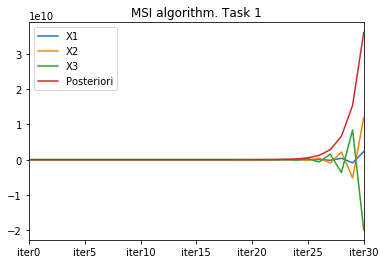

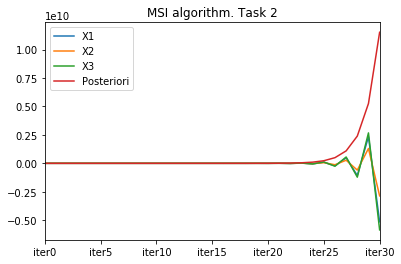

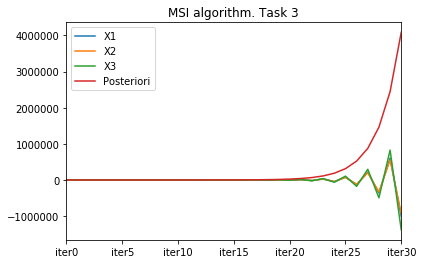

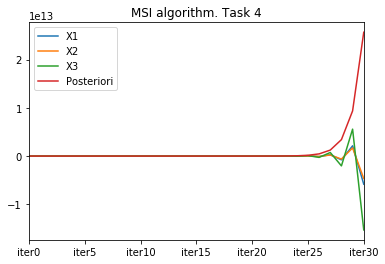

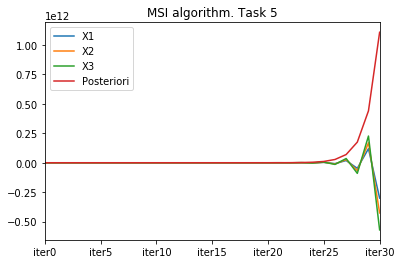

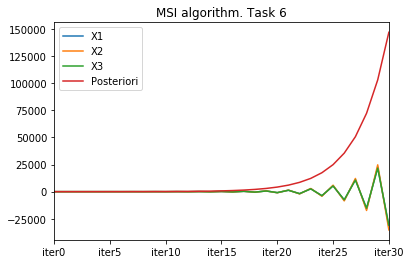

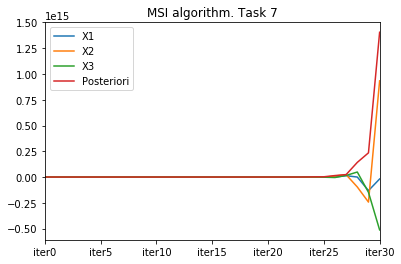

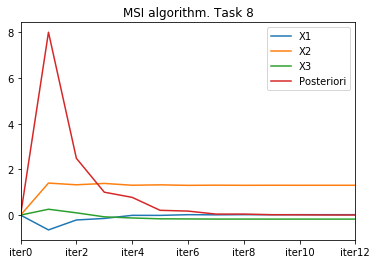

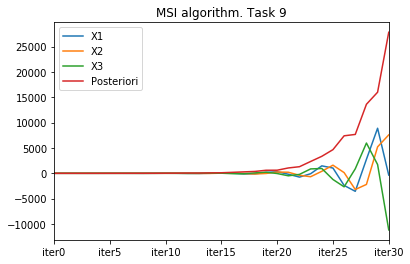

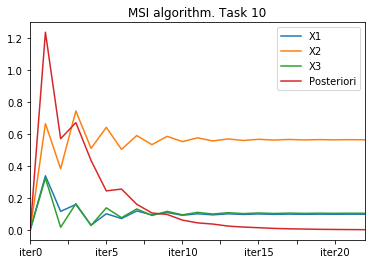

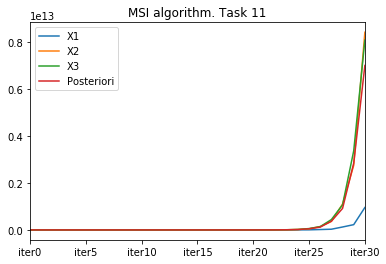

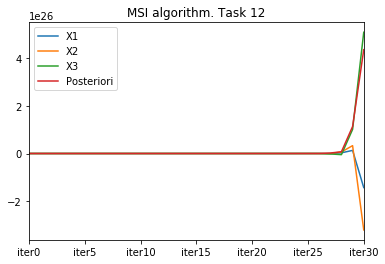

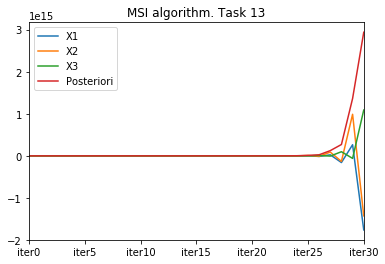

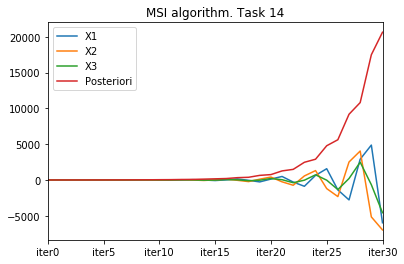

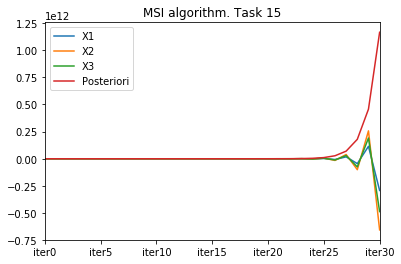

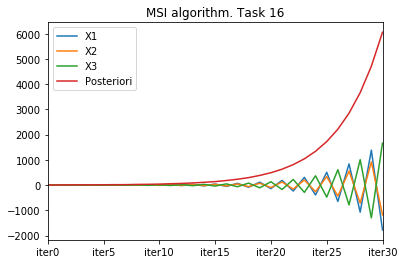

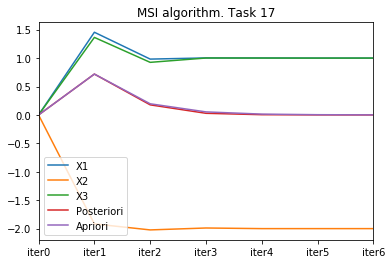

In [66]:
for i in range(17):
    print("\nTask "+str(i+1))
    A,b = read_xlsx(i+1)
    X=Solve(A,b,method="MSI",v=i+1,div=True,k=30)
    print(X)


Task 1
This algorithm doesn't converge after 20 iterations with epsilon = 0.001
The order of convergence is higher than 3
The error of the system is the following:
              0
0 -1.408055e+06
1 -2.692477e+06
2  0.000000e+00
Convergence speed is -0.353206865402
                  X1            X2            X3    Posteriori
iter1   7.777778e-01  6.013072e-01  3.456747e+00  0.000000e+00
iter2  -1.621513e+00  1.355057e+00  2.418394e-01  1.135528e+00
iter3  -9.948442e-01 -2.649885e+00 -1.191070e+01  4.292361e+00
iter4   9.751309e+00 -5.414036e-01  2.120013e+01  1.169497e+01
iter5  -8.767978e+00  1.586615e+01  3.251467e+01  6.541139e+00
iter6  -3.426939e+01 -1.800105e+01 -1.445356e+02  6.253539e+01
iter7   9.237030e+01 -4.888456e+01  5.552222e+01  7.066181e+01
iter8   3.379266e+01  1.600215e+02  6.269850e+02  2.018446e+02
iter9  -4.966857e+02  9.092967e+00 -1.167337e+03  6.337667e+02
iter10  5.517151e+02 -7.877879e+02 -1.357611e+03  3.703023e+02
iter11  1.617294e+03  1.092658e+03  7.627

This algorithm doesn't converge after 20 iterations with epsilon = 0.001
The order of convergence is higher than 3
The error of the system is the following:
              0
0  3.209856e+16
1  2.284156e+17
2  2.866700e+00
Convergence speed is -3.125
                  X1            X2            X3    Posteriori
iter1   2.031250e+00 -3.693015e+00 -6.362623e+00  0.000000e+00
iter2   6.502865e+00  2.154419e+01  3.710415e+01  1.358337e+02
iter3  -2.403903e+01 -1.508751e+02 -2.598502e+02  9.279823e+02
iter4   1.846118e+02  1.027057e+03  1.768873e+03  6.339761e+03
iter5  -1.240840e+03 -7.020308e+03 -1.209090e+04  4.331180e+04
iter6   8.497521e+03  4.795745e+04  8.259591e+04  2.958963e+05
iter7  -5.803273e+04 -3.276380e+05 -5.642827e+05  2.021496e+06
iter8   3.964867e+05  2.238344e+06  3.855044e+06  1.381040e+07
iter9  -2.708686e+06 -1.529186e+07 -2.633678e+07  9.434946e+07
iter10  1.850514e+07  1.044705e+08  1.799269e+08  6.445739e+08
iter11 -1.264229e+08 -7.137184e+08 -1.229219e+09  4.403582

This algorithm doesn't converge after 20 iterations with epsilon = 0.001
The order of convergence is higher than 3
The error of the system is the following:
              0
0 -1.553144e+06
1  2.980798e+05
2  0.000000e+00
Convergence speed is -2.59427609428
                   X1             X2             X3    Posteriori
iter1        1.203704      -2.127214      -0.902322  0.000000e+00
iter2       -1.322202       1.920584       1.864718  1.050111e+01
iter3        3.581478      -6.290782      -3.609318  2.130255e+01
iter4       -6.353242      10.299338       7.467645  4.303935e+01
iter5       13.720318     -23.227477     -14.915523  8.697781e+01
iter6      -26.845948      44.525497      30.317980  1.757699e+02
iter7       55.132791     -92.393857     -61.092616  3.552066e+02
iter8     -110.534856     184.301132     123.635500  7.178232e+02
iter9      224.256439    -374.860997    -249.674355  1.450621e+03
iter10    -452.310252     755.127974     504.732993  2.931503e+03
iter11     914.93

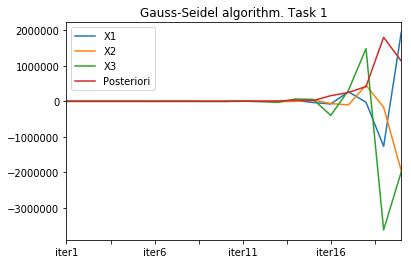

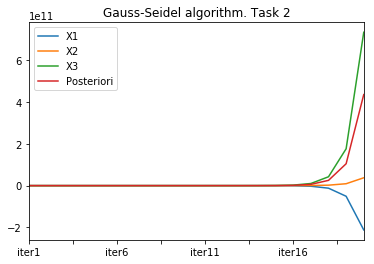

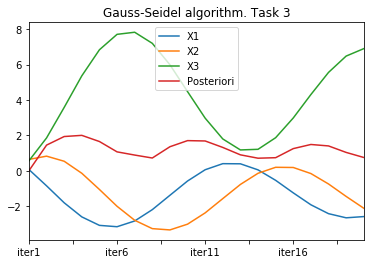

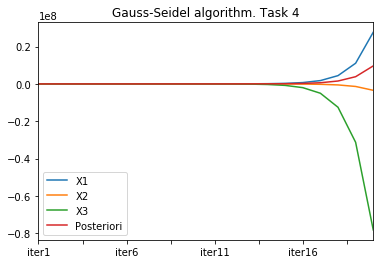

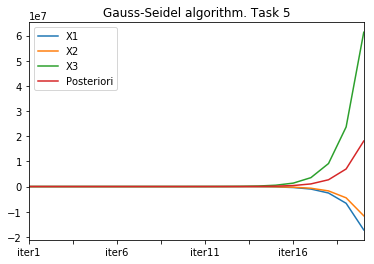

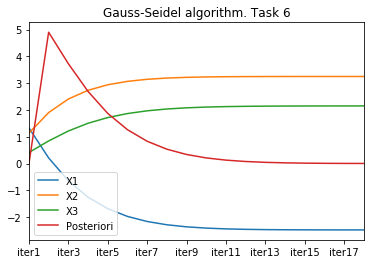

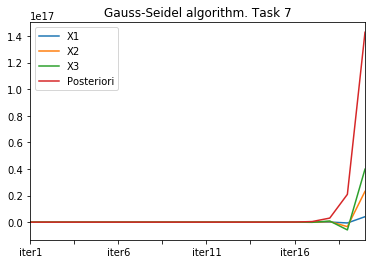

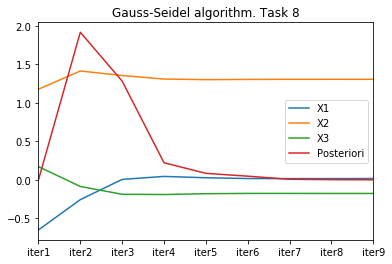

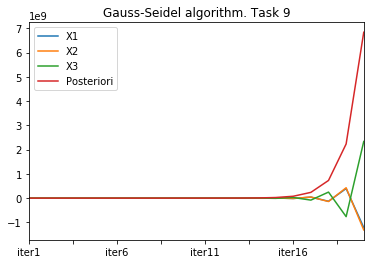

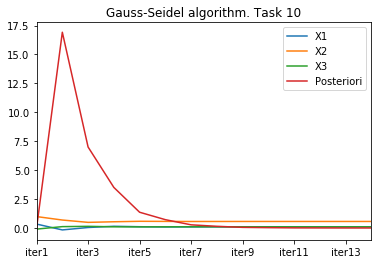

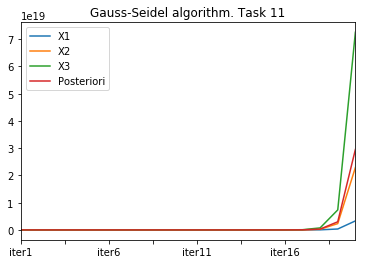

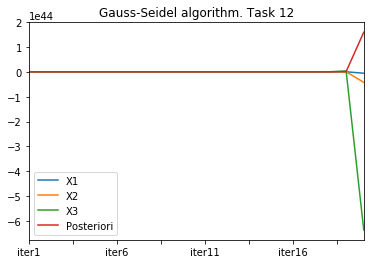

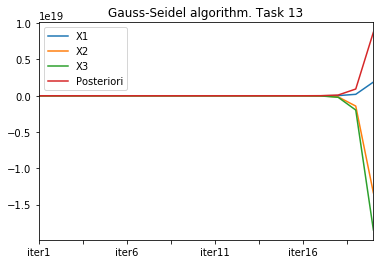

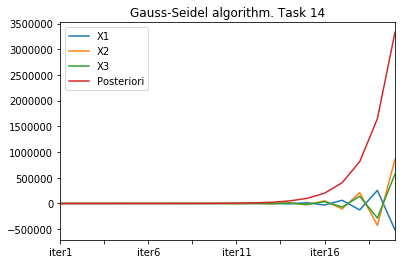

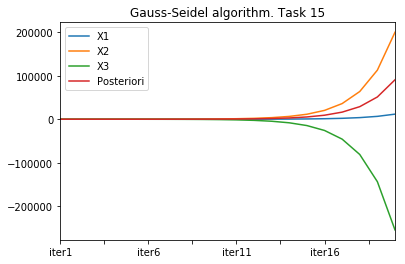

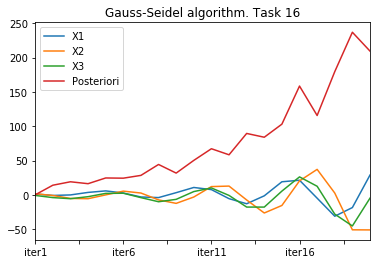

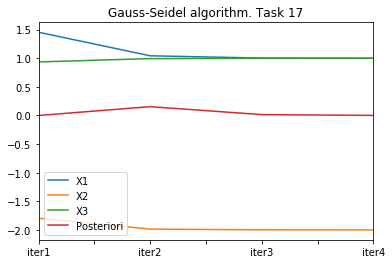

In [69]:
for i in range(17):
    print("\nTask "+str(i+1))
    A,b = read_xlsx(i+1)
    X=Solve(A,b,method="Gauss-Seidel",k=20,div=True,v=i+1)
    print(X)